# Prediction of teams that will reach the Playoffs

## Data import

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

players = pd.read_csv('basketballPlayoffs/players.csv', delimiter=",")
coaches = pd.read_csv('basketballPlayoffs/coaches.csv', delimiter=",")
teams = pd.read_csv('basketballPlayoffs/teams.csv', delimiter=",")
players_teams = pd.read_csv('basketballPlayoffs/players_teams.csv', delimiter=",")
teams_post = pd.read_csv('basketballPlayoffs/teams_post.csv', delimiter=",")
series_post = pd.read_csv('basketballPlayoffs/series_post.csv', delimiter=",")
awards_players = pd.read_csv('basketballPlayoffs/awards_players.csv', delimiter=",")
awards_coaches = pd.read_csv('basketballPlayoffs/awards_coaches.csv', delimiter=",")

print(players.head())
print(coaches)
print(teams)
print(players_teams)
print(teams_post)
print(series_post)
print(awards_players)
print(awards_coaches)


players.isnull().sum()
#players.describe()

     playerID  pos  firstseason  lastseason  height  weight   
0  abrahta01w    C            0           0    74.0     190  \
1  abrossv01w    F            0           0    74.0     169   
2  adairje01w    C            0           0    76.0     197   
3  adamsda01w  F-C            0           0    73.0     239   
4  adamsjo01w    C            0           0    75.0     180   

             college            collegeOther   birthDate   deathDate  
0  George Washington                     NaN  1975-09-27  0000-00-00  
1        Connecticut                     NaN  1980-07-09  0000-00-00  
2  George Washington                     NaN  1986-12-19  0000-00-00  
3          Texas A&M  Jefferson College (JC)  1989-02-19  0000-00-00  
4         New Mexico                     NaN  1981-05-24  0000-00-00  
        coachID  year tmID  lgID  stint  won  lost  post_wins  post_losses
0    adamsmi01w     5  WAS  WNBA      0   17    17          1            2
1    adubari99w     1  NYL  WNBA      0   20 

playerID          0
pos              78
firstseason       0
lastseason        0
height            0
weight            0
college         167
collegeOther    882
birthDate         0
deathDate         0
dtype: int64

## Data cleaning

Selecting relevant features and deleting unnecessary rows.

### Players dataset

In [110]:
from datetime import datetime

# to delete:  deathDate, collegeOther, , firstseason, lastseason linhas com pos=""
# show all players that have Pos: nullpd.set_option('display.max_rows', None)
print(players.isna().sum())
players = players.drop(columns=['collegeOther', 'deathDate', 'firstseason', 'lastseason'])
players.dropna(subset=['pos'], inplace=True)

# Define a function to calculate age from a date string
def calculate_age(date_str):
    if (date_str == 0) or (date_str == "0000-00-00"): return
    
    date_of_birth = datetime.strptime(str(date_str), "%Y-%m-%d")
    current_date = datetime.now()
    age_timedelta = current_date - date_of_birth
    age_years = age_timedelta.days // 365  # This is a simple approximation
    return int(age_years)

players['birthDate'].fillna(0, inplace=True)
# Apply the function to the "date_of_birth" column and create a new "age" column
players['birthDate'] = players['birthDate'].apply(calculate_age)
players.rename(columns={'birthDate': 'age'}, inplace=True)

print(players)

playerID          0
pos              78
firstseason       0
lastseason        0
height            0
weight            0
college         167
collegeOther    882
birthDate         0
deathDate         0
dtype: int64
       playerID  pos  height  weight            college   age
0    abrahta01w    C    74.0     190  George Washington  48.0
1    abrossv01w    F    74.0     169        Connecticut  43.0
2    adairje01w    C    76.0     197  George Washington  36.0
3    adamsda01w  F-C    73.0     239          Texas A&M  34.0
4    adamsjo01w    C    75.0     180         New Mexico  42.0
..          ...  ...     ...     ...                ...   ...
887   zarafr01w    G    70.0     146                NaN  46.0
888  zellosh01w    G    70.0     155         Pittsburgh  37.0
889  zhengha01w    C    80.0     254                NaN  56.0
891  zirkozu01w    G    69.0     145                NaN  43.0
892   zollsh01w    G    67.0     148           Virginia  37.0

[815 rows x 6 columns]


### Coaches dataset

In [111]:
# to delete: lgID, post_wins, post_losses
# print(coaches.isna().sum())
coaches = coaches.drop(columns=['lgID', 'post_wins', 'post_losses'])
print(coaches.head())

      coachID  year tmID  stint  won  lost
0  adamsmi01w     5  WAS      0   17    17
1  adubari99w     1  NYL      0   20    12
2  adubari99w     2  NYL      0   21    11
3  adubari99w     3  NYL      0   18    14
4  adubari99w     4  NYL      0   16    18


### Teams dataset

In [112]:
# to delete: lgID, divID, seeded, tmORB, tmDRB, tmTRB, opptmORB, opptmDRB, opptmTRB, rank, firstRound, semis, finals
print(teams.isna().sum())
   
teams = teams.drop(columns=['lgID', 'divID', 'seeded', 'tmORB', 'tmDRB', 'tmTRB', 'opptmORB', 'opptmDRB', 'opptmTRB'])
teams = teams.drop(columns=['rank', 'firstRound', 'semis', 'finals'])
teams = teams.drop(columns=['min', 'o_oreb', 'o_dreb', 'd_oreb', 'd_dreb', 'arena', 'name'])

print(teams.head())

year        0
lgID        0
tmID        0
franchID    0
confID      0
           ..
confW       0
confL       0
min         0
attend      0
arena       0
Length: 61, dtype: int64
   year tmID franchID confID playoff  o_fgm  o_fga  o_ftm  o_fta  o_3pm  ...   
0     9  ATL      ATL     EA       N    895   2258    542    725    202  ...  \
1    10  ATL      ATL     EA       Y   1089   2428    569    755    114  ...   
2     1  CHA      CHA     EA       N    812   1903    431    577    131  ...   
3     2  CHA      CHA     EA       Y    746   1780    410    528    153  ...   
4     3  CHA      CHA     EA       Y    770   1790    490    663    211  ...   

   won  lost  GP  homeW  homeL  awayW  awayL  confW  confL  attend  
0    4    30  34      1     16      3     14      2     18  141379  
1   18    16  34     12      5      6     11     10     12  120737  
2    8    24  32      5     11      3     13      5     16   90963  
3   18    14  32     11      5      7      9     15      6  1055

### Players Teams dataset

In [113]:
# to delete: lgID 
# "PostGP","PostGS","PostMinutes","PostPoints","PostoRebounds","PostdRebounds","PostRebounds","PostAssists","PostSteals",
# "PostBlocks","PostTurnovers","PostPF","PostfgAttempted","PostfgMade","PostftAttempted","PostftMade","PostthreeAttempted","PostthreeMade","PostDQ"

#print(players_teams.isna().sum())
players_teams = players_teams.drop(columns=['lgID', "PostGP","PostGS","PostMinutes","PostPoints","PostoRebounds","PostdRebounds","PostRebounds","PostAssists","PostSteals","PostBlocks","PostTurnovers","PostPF","PostfgAttempted","PostfgMade","PostftAttempted","PostftMade","PostthreeAttempted","PostthreeMade","PostDQ"])
print(players_teams.head())

     playerID  year  stint tmID  GP  GS  minutes  points  oRebounds   
0  abrossv01w     2      0  MIN  26  23      846     343         43  \
1  abrossv01w     3      0  MIN  27  27      805     314         45   
2  abrossv01w     4      0  MIN  30  25      792     318         44   
3  abrossv01w     5      0  MIN  22  11      462     146         17   
4  abrossv01w     6      0  MIN  31  31      777     304         29   

   dRebounds  ...  blocks  turnovers  PF  fgAttempted  fgMade  ftAttempted   
0        131  ...       9         85  70          293     114          132  \
1        101  ...      10         92  73          316     119          116   
2         97  ...      11         90  79          285     112           98   
3         57  ...       2         43  42          139      49           46   
4         78  ...       6         80  86          276     109           73   

   ftMade  threeAttempted  threeMade  dq  
0      96              76         19   2  
1      56         

### Awards Players dataset

In [114]:
# to delete: lgID
awards_players = awards_players.drop(columns=['lgID'])
print(awards_players.head())

     playerID                               award  year
0  thompti01w  All-Star Game Most Valuable Player     1
1  leslili01w  All-Star Game Most Valuable Player     2
2  leslili01w  All-Star Game Most Valuable Player     3
3  teaslni01w  All-Star Game Most Valuable Player     4
4  swoopsh01w  All-Star Game Most Valuable Player     6


### Awards Coaches dataset

In [115]:
# to delete: lgID
#print(awards_players.isna().sum()) 
awards_coaches = awards_coaches.drop(columns=['lgID'])
print(awards_coaches.head())

      coachID              award  year
0  coopemi01w  Coach of the Year     1
1  hugheda99w  Coach of the Year     2
2  stanlma99w  Coach of the Year     3
3  laimbbi01w  Coach of the Year     4
4  mcconsu01w  Coach of the Year     5


## Feature Selection

### Player Rating


**Positions - Relevant Stats**

**Point Guard**
Assists(AST), Points(PTS), Assist-to-Turnover Ratio(AST/TO), Steals(STL), Three-Point Percentage(3P%), Free Throw Percentage(FT%), Minutes Played(MIN), Defensive Rating and Defensive Contribution(USG%), Clutch Performance.

**Shooting Guard**
Points per Game(PPG), Field Goal Percentage(FG%), Three-Point Percentage(3P%), Free Throw Percentage(FT%), Assists(AST), Rebounds(REB), Steals(STL), Blocks(BLK), Usage Rate(USG%), Effective Field Goal Percentage(eFG%)

**Small Forward**
Points per Game(PPG), Field Goal Percentage(FG%), Three-Point Percentage(3P%), Rebounds(REB), Assists(AST), Steals(STL), Blocks(BLK), Usage Rate(USG%), Player Efficiency Rating(PER)

**Power Forward**
Points per Game(PPG), Field Goal Percentage(FG%), Rebounds(REB), Defensive Rebounds(DREB), Blocks(BLK) Steals(STL), Usage Rate(USG%), Free Throw Percentage(FT%), Player Efficiency Rating(PER)

**Center**
Points per Game(PPG), Field Goal Percentage(FG%), Rebounds(REB), Defensive Rebounds(DREB), Blocks(BLK), Steals(STL), Usage Rate(USG%), Free Throw Percentage(FT%), Player Efficiency Rating(PER)


**Features in Dataset**

- GP (Games Played)
- GS (Games Started)
- minutes (Minutes Played)
- points (Points Scored)
- oRebounds (ofensive rebounds)
- dRebounds (defensive rebounds)
- rebounds (oRebounds + dRebounds)
- assists (assists)
- steals (steals)
- blocks (blocks)
- turnovers (turnovers)
- Personal Fouls (fouls)
- fgAttempted (field goals attempted)
- fgMade (field goals made)
- ftAttempted (free throws attempted)
- ftMade (free throws made)
- threeAttempted (three points attempted)
- threeMade (three points made)
- dq (times fouled out)

**Features to create**

- Points per Game (PPG): points/GP
- Field Goal Percentage(FG%): fgMade/fgAttempted
- Free Throw Percentage (FT%): ftMade/ftAttempted
- Three Points Percentage (3P%): threeAttempted/threeMade
- Effective Field Goal Percentage(eFG%): (fgMade + 0.5 * threeMade) / fgAttempted

https://captaincalculator.com/sports/basketball/efficiency/

In [116]:
# highest and lowest value per feature to calculate rating (0-100)
pointsPerGameMax = 0
pointsPerGameMin = 999

assistPerGameMax = 0
assistPerGameMin = 999

reboundsPerGameMax = 0
reboundsPerGameMin = 999

defensiveReboundsPerGameMax = 0
defensiveReboundsPerGameMin = 999

stealsPerGameMax = 0
stealsPerGameMin = 999

blocksPerGameMax = 0
blocksPerGameMin = 999

turnoversPerGameMax = 0
turnoversPerGameMin = 999

assistToTurnoverRatioMax = 0
assistToTurnoverRatioMin = 999

minutesMax = 0
minutesMin = 999

# percentage
startsMax = 0
startsMin = 1

threePointPercentageMax = 0
threePointPercentageMin = 1

freeThrowPercentageMax = 0
freeThrowPercentageMin = 1

fieldGoalPercentageMax = 0
fieldGoalPercentageMin = 1

trueShootingPercentageMax = 0
trueShootingPercentageMin = 1

personalFoulsPerGameMax = 0
personalFoulsPerGameMin = 999

for index, row in players_teams.iterrows(): 
    if row['GP'] == 0:
        pointsPerGameMin = 0
        players_teams.at[index, 'pointsPerGame'] = 0
    else: 
        if ( row['points'] / row['GP'] ) > pointsPerGameMax:
            pointsPerGameMax = ( row['points'] / row['GP'] )
        if ( row['points'] / row['GP'] ) < pointsPerGameMin:
            pointsPerGameMin = ( row['points'] / row['GP'] )

        players_teams.at[index, 'pointsPerGame'] = ( row['points'] / row['GP'] )

    
    if row['GP'] == 0:
        assistPerGameMin = 0
        players_teams.at[index, 'assistPerGame'] = 0
    else: 
        if ( row['assists'] / row['GP'] ) > assistPerGameMax:
            assistPerGameMax = ( row['assists'] / row['GP'] )
        if ( row['assists'] / row['GP'] ) < assistPerGameMin:
            assistPerGameMin = ( row['assists'] / row['GP'] )

        players_teams.at[index, 'assistPerGame'] = ( row['assists'] / row['GP'] )

    if row['GP'] == 0:
        reboundsPerGameMin = 0
        players_teams.at[index, 'reboundsPerGame'] = 0
    else: 
        if ( row['rebounds'] / row['GP'] ) > reboundsPerGameMax:
            reboundsPerGameMax = ( row['rebounds'] / row['GP'] )
        if ( row['rebounds'] / row['GP'] ) < reboundsPerGameMin:
            reboundsPerGameMin = ( row['rebounds'] / row['GP'] )

        players_teams.at[index, 'reboundsPerGame'] = ( row['rebounds'] / row['GP'] )

    if row['GP'] == 0:
        defensiveReboundsPerGameMin = 0
        players_teams.at[index, 'defensiveReboundsPerGame'] = 0
    else: 
        if ( row['dRebounds'] / row['GP'] ) > defensiveReboundsPerGameMax:
            defensiveReboundsPerGameMax = ( row['dRebounds'] / row['GP'] )
        if ( row['dRebounds'] / row['GP'] ) < defensiveReboundsPerGameMin:
            defensiveReboundsPerGameMin = ( row['dRebounds'] / row['GP'] )

        players_teams.at[index, 'defensiveReboundsPerGame'] = ( row['dRebounds'] / row['GP'] )

    if row['GP'] == 0:
        stealsPerGameMin = 0
        players_teams.at[index, 'stealsPerGame'] = 0
    else: 
        if ( row['steals'] / row['GP'] ) > stealsPerGameMax:
            stealsPerGameMax = ( row['steals'] / row['GP'] )
        if ( row['steals'] / row['GP'] ) < stealsPerGameMin:
            stealsPerGameMin = ( row['steals'] / row['GP'] )

        players_teams.at[index, 'stealsPerGame'] = ( row['steals'] / row['GP'] )

    if row['GP'] == 0:
        blocksPerGameMin = 0
        players_teams.at[index, 'blocksPerGame'] = 0
    else: 
        if ( row['blocks'] / row['GP'] ) > blocksPerGameMax:
            blocksPerGameMax = ( row['blocks'] / row['GP'] )
        if ( row['blocks'] / row['GP'] ) < blocksPerGameMin:
            blocksPerGameMin = ( row['blocks'] / row['GP'] )

        players_teams.at[index, 'blocksPerGame'] = ( row['blocks'] / row['GP'] )

    if row['GP'] == 0:
        turnoversPerGameMin = 0
        players_teams.at[index, 'turnoversPerGame'] = 0
    else: 
        if ( row['turnovers'] / row['GP'] ) > turnoversPerGameMax:
            turnoversPerGameMax = ( row['turnovers'] / row['GP'] )
        if ( row['turnovers'] / row['GP'] ) < turnoversPerGameMin:
            turnoversPerGameMin = ( row['turnovers'] / row['GP'] )

        players_teams.at[index, 'turnoversPerGame'] = ( row['turnovers'] / row['GP'] )

    if row['turnovers'] == 0 and row['assists'] == 0:
        assistToTurnoverRatioMin = 0
        players_teams.at[index, 'assistToTurnoverRatio'] = 0

    elif row['turnovers'] == 0 and row['assists'] > 0:
        if(assistToTurnoverRatioMax < row['assists']): 
            assistToTurnoverRatioMax = row['assists']

        players_teams.at[index, 'assistToTurnoverRatio'] = row['assists']
    else: 
        if ( row['assists'] / row['turnovers'] ) > assistToTurnoverRatioMax:
            assistToTurnoverRatioMax = ( row['assists'] / row['turnovers'] )
        if ( row['assists'] / row['turnovers'] ) < assistToTurnoverRatioMin:
            assistToTurnoverRatioMin = ( row['assists'] / row['turnovers'] )

        players_teams.at[index, 'assistToTurnoverRatio'] = ( row['assists'] / row['turnovers'] )

    if ( row['minutes'] ) > minutesMax:
        minutesMax = ( row['minutes'] )
    if ( row['minutes'] ) < minutesMin:
        minutesMin = ( row['minutes'] )

    if row['GP'] == 0:
        startsMin = 0
    else: 
        if ( row['GS'] / row['GP'] ) > startsMax:
            startsMax = ( row['GS'] / row['GP'] )
        if ( row['GS'] / row['GP'] ) < startsMin:
            startsMin = ( row['GS'] / row['GP'] )
    
    if row['threeAttempted'] == 0:
        threePointPercentageMin = 0
        players_teams.at[index, 'threePointPercentage'] = 0
    else: 
        if ( row['threeMade'] / row['threeAttempted'] ) > threePointPercentageMax:
            threePointPercentageMax = ( row['threeMade'] / row['threeAttempted'] )
        if ( row['threeMade'] / row['threeAttempted'] ) < threePointPercentageMin:
            threePointPercentageMin = ( row['threeMade'] / row['threeAttempted'] )

        players_teams.at[index, 'threePointPercentage'] = ( row['threeMade'] / row['threeAttempted'] )

    if row['ftAttempted'] == 0:
        freeThrowPercentageMin = 0
        players_teams.at[index, 'freeThrowPercentage'] = 0
    else: 
        if ( row['ftMade'] / row['ftAttempted'] ) > freeThrowPercentageMax:
            freeThrowPercentageMax = ( row['ftMade'] / row['ftAttempted'] )
        if ( row['ftMade'] / row['ftAttempted'] ) < freeThrowPercentageMin:
            freeThrowPercentageMin = ( row['ftMade'] / row['ftAttempted'] )

        players_teams.at[index, 'freeThrowPercentage'] = ( row['ftMade'] / row['ftAttempted'] )

    if row['fgAttempted'] == 0:
        fieldGoalPercentageMin = 0
        players_teams.at[index, 'fieldGoalPercentage'] = 0
    else: 
        if ( row['fgMade'] / row['fgAttempted'] ) > fieldGoalPercentageMax:
            fieldGoalPercentageMax = ( row['fgMade'] / row['fgAttempted'] )
        if ( row['fgMade'] / row['fgAttempted'] ) < fieldGoalPercentageMin:
            fieldGoalPercentageMin = ( row['fgMade'] / row['fgAttempted'] )

        players_teams.at[index, 'fieldGoalPercentage'] = ( row['fgMade'] / row['fgAttempted'] )

    # True Shooting Percentage
    if row['points'] == 0:
        players_teams.at[index, 'trueShootingPercentage'] = 0
        trueShootingPercentageMin = 0
    else:
        if ( row['points'] / (2.3 * ((row['fgAttempted'] + row['threeAttempted']) + 0.44 * row['ftAttempted'])) ) > trueShootingPercentageMax:
            trueShootingPercentageMax = ( row['points'] / (2.3 * ((row['fgAttempted'] + row['threeAttempted']) + 0.44 * row['ftAttempted'])) )
        if ( row['points'] / (2.3 * ((row['fgAttempted'] + row['threeAttempted']) + 0.44 * row['ftAttempted'])) ) < trueShootingPercentageMin:
            trueShootingPercentageMin = ( row['points'] / (2.3 * ((row['fgAttempted'] + row['threeAttempted']) + 0.44 * row['ftAttempted'])) )

        players_teams.at[index, 'trueShootingPercentage'] = row['points'] / (2.3 * ((row['fgAttempted'] + row['threeAttempted']) + 0.44 * row['ftAttempted']))

    # Personal Fouls Per Game
    if row['GP'] == 0:
        players_teams.at[index, 'personalFoulsPerGame'] = 0
        personalFoulsPerGameMin = 0
    else:
        if ( row['PF'] / row['GP'] ) > personalFoulsPerGameMax:
            personalFoulsPerGameMax = ( row['PF'] / row['GP'] )
        if ( row['PF'] / row['GP'] ) < personalFoulsPerGameMin:
            personalFoulsPerGameMin = ( row['PF'] / row['GP'] )

        players_teams.at[index, 'personalFoulsPerGame'] = row['PF'] / row['GP']


players_teams.to_csv('test.csv', index=False)

print("pointsPerGameMax: ", pointsPerGameMax)
print("pointsPerGameMin: ", pointsPerGameMin)
print("assistPerGameMax: ", assistPerGameMax)
print("assistPerGameMin: ", assistPerGameMin)
print("reboundsPerGameMax: ", reboundsPerGameMax)
print("reboundsPerGameMin: ", reboundsPerGameMin)
print("defensiveReboundsPerGameMax: ", defensiveReboundsPerGameMax)
print("defensiveReboundsPerGameMin: ", defensiveReboundsPerGameMin)
print("stealsPerGameMax: ", stealsPerGameMax)
print("stealsPerGameMin: ", stealsPerGameMin)
print("blocksPerGameMax: ", blocksPerGameMax)
print("blocksPerGameMin: ", blocksPerGameMin)
print("turnoversPerGameMax: ", turnoversPerGameMax)
print("turnoversPerGameMin: ", turnoversPerGameMin)
print("assistToTurnoverRatioMax: ", assistToTurnoverRatioMax)
print("assistToTurnoverRatioMin: ", assistToTurnoverRatioMin)
print("minutesMax: ", minutesMax)
print("minutesMin: ", minutesMin)
print("startsMax: ", startsMax)
print("startsMin: ", startsMin)
print("threePointPercentageMax: ", threePointPercentageMax)
print("threePointPercentageMin: ", threePointPercentageMin)
print("freeThrowPercentageMax: ", freeThrowPercentageMax)
print("freeThrowPercentageMin: ", freeThrowPercentageMin)
print("fieldGoalPercentageMax: ", fieldGoalPercentageMax)
print("fieldGoalPercentageMin: ", fieldGoalPercentageMin)
print("trueShootingPercentageMax: ", trueShootingPercentageMax)
print("trueShootingPercentageMin: ", trueShootingPercentageMin)
print("personalFoulsPerGameMax: ", personalFoulsPerGameMax)
print("personalFoulsPerGameMin: ", personalFoulsPerGameMin)

pointsPerGameMax:  25.294117647058822
pointsPerGameMin:  0.0
assistPerGameMax:  8.0
assistPerGameMin:  0.0
reboundsPerGameMax:  11.6
reboundsPerGameMin:  0.0
defensiveReboundsPerGameMax:  8.9
defensiveReboundsPerGameMin:  0.0
stealsPerGameMax:  5.0
stealsPerGameMin:  0.0
blocksPerGameMax:  3.566666666666667
blocksPerGameMin:  0.0
turnoversPerGameMax:  5.2
turnoversPerGameMin:  0.0
assistToTurnoverRatioMax:  5.5
assistToTurnoverRatioMin:  0
minutesMax:  1234
minutesMin:  0
startsMax:  1.0
startsMin:  0.0
threePointPercentageMax:  1.0
threePointPercentageMin:  0
freeThrowPercentageMax:  1.0
freeThrowPercentageMin:  0
fieldGoalPercentageMax:  1.0
fieldGoalPercentageMin:  0
trueShootingPercentageMax:  0.9881422924901185
trueShootingPercentageMin:  0
personalFoulsPerGameMax:  4.6
personalFoulsPerGameMin:  0.0


#### **Forward**

Points per Game(PPG), Field Goal Percentage(FG%), Free Throw Percentage(FT%), Three-Point Percentage(3P%), Rebounds(REB), Assists(AST), Steals(STL), Blocks(BLK), Usage Rate(USG%), Player Efficiency Rating(PER)

Features we do have in dataset:
- points/GP, fgMade/fgAttempted, ftMade/ftAttempted, threeMade/threeAttempted, rebounds, assists, steals, blocks, minutes, GS/GP

In [117]:
def forward_power_ranking(player): 

    if(player['fgAttempted'] == 0):
        fieldGoalPercentage = 0
    else:
        fieldGoalPercentage = (player['fgMade'] / player['fgAttempted']) * 100

    if(player['threeAttempted'] == 0):
        threePointPercentage = 0
    else:
        threePointPercentage = (player['threeMade'] / player['threeAttempted']) * 100

    if(player['ftAttempted'] == 0):
        freeThrowPercentage = 0
    else:
        freeThrowPercentage = (player['ftMade'] / player['ftAttempted']) * 100

    if(player['GP'] == 0): 
        pointsPerGame = 0
        reboundsPerGame = 0
        assistsPerGame = 0
        stealsPerGame = 0
        blocksPerGame = 0
        starts = 0
    else:
        pointsPerGame = (((player['points'] / player['GP']) - pointsPerGameMin) / (pointsPerGameMax - pointsPerGameMin)) * 100
        reboundsPerGame = (((player['rebounds'] / player['GP']) - reboundsPerGameMin) / (reboundsPerGameMax - reboundsPerGameMin)) * 100
        assistsPerGame = (((player['assists'] / player['GP']) - assistPerGameMin) / (assistPerGameMax - assistPerGameMin)) * 100
        stealsPerGame = (((player['steals'] / player['GP']) - stealsPerGameMin) / (stealsPerGameMax - stealsPerGameMin)) * 100
        blocksPerGame = (((player['blocks'] / player['GP']) - blocksPerGameMin) / (blocksPerGameMax - blocksPerGameMin)) * 100
        starts = (player['GS'] / player['GP']) * 100

    minutes = (player['minutes'] / minutesMax) * 100

    relevantFeatures = [pointsPerGame, fieldGoalPercentage, freeThrowPercentage, threePointPercentage, reboundsPerGame, assistsPerGame, stealsPerGame, blocksPerGame, minutes, starts]

    powerRankingAcummulator = 0
    numberOfFeatures = len(relevantFeatures)
    minutesWeight = ((100 / numberOfFeatures) * 2.0) / 100
    averageFeatureWeight = (1 - minutesWeight) / (numberOfFeatures - 1)

    for feature in relevantFeatures: 
        if feature == minutes: 
            powerRankingAcummulator += feature * minutesWeight

        else:
            powerRankingAcummulator += feature * averageFeatureWeight
            

    return powerRankingAcummulator

#### **Guard**

Points per Game(PPG), Field Goal Percentage(FG%), Three-Point Percentage(3P%), Free Throw Percentage(FT%), Assist-to-Turnover Ratio(AST/TO), Assists(AST), Rebounds(REB), Steals(STL), Blocks(BLK), Usage Rate(USG%), Effective Field Goal Percentage(eFG%)

Features we do have in dataset: 
- points/GP, fgMade/fgAttempted, threeMade/threeAttempted, ftMade/ftAttempted, assists/turnovers, assists, rebounds, steals, blocks, minutes, GS/GP

In [118]:
def guard_power_ranking(player): 
    
    if(player['fgAttempted'] == 0):
        fieldGoalPercentage = 0
    else:
        fieldGoalPercentage = (player['fgMade'] / player['fgAttempted']) * 100

    if(player['threeAttempted'] == 0):
        threePointPercentage = 0
    else:
        threePointPercentage = (player['threeMade'] / player['threeAttempted']) * 100

    if(player['ftAttempted'] == 0):
        freeThrowPercentage = 0
    else:
        freeThrowPercentage = (player['ftMade'] / player['ftAttempted']) * 100

    if(player['turnovers'] == 0):
        assistToTurnoverRatio = player['assists']
    else:
        assistToTurnoverRatio = (((player['assists'] / player['turnovers']) - assistToTurnoverRatioMin) / (assistToTurnoverRatioMax - assistToTurnoverRatioMin)) * 100

    if(player['GP'] == 0):
        pointsPerGame = 0
        assistsPerGame = 0
        reboundsPerGame = 0
        stealsPerGame = 0
        blocksPerGame = 0
        starts = 0
    else:
        pointsPerGame = (((player['points'] / player['GP']) - pointsPerGameMin) / (pointsPerGameMax - pointsPerGameMin)) * 100
        assistsPerGame = (((player['assists'] / player['GP']) - assistPerGameMin) / (assistPerGameMax - assistPerGameMin)) * 100
        reboundsPerGame = (((player['rebounds'] / player['GP']) - reboundsPerGameMin) / (reboundsPerGameMax - reboundsPerGameMin)) * 100
        stealsPerGame = (((player['steals'] / player['GP']) - stealsPerGameMin) / (stealsPerGameMax - stealsPerGameMin)) * 100
        blocksPerGame = (((player['blocks'] / player['GP']) - blocksPerGameMin) / (blocksPerGameMax - blocksPerGameMin)) * 100
        starts = (player['GS'] / player['GP']) * 100

    minutes = (player['minutes'] / minutesMax) * 100

    relevantFeatures = [pointsPerGame, fieldGoalPercentage, threePointPercentage, freeThrowPercentage, assistToTurnoverRatio, assistsPerGame, reboundsPerGame, stealsPerGame, blocksPerGame, minutes, starts]

    powerRankingAcummulator = 0
    numberOfFeatures = len(relevantFeatures)
    minutesWeight = ((100 / numberOfFeatures) * 2.0) / 100
    averageFeatureWeight = (1 - minutesWeight) / (numberOfFeatures - 1)

    for feature in relevantFeatures: 
        if feature == minutes: 
            powerRankingAcummulator += feature * minutesWeight

        else:
            powerRankingAcummulator += feature * averageFeatureWeight
            

    return powerRankingAcummulator

#### **Center**

Points per Game(PPG), Field Goal Percentage(FG%), Rebounds(REB), Defensive Rebounds(DREB), Blocks(BLK), Steals(STL), Usage Rate(USG%), Free Throw Percentage(FT%), Player Efficiency Rating(PER)

Features we do have in dataset: 
-  points/GP, fgMade/fgAttempted, rebounds, dRebounds, blocks, steals, minutes, GS/GP, ftMade/ftAttempted

In [119]:
def center_power_ranking(player): 

    if(player['fgAttempted'] == 0):
        fieldGoalPercentage = 0
    else:
        fieldGoalPercentage = (player['fgMade'] / player['fgAttempted']) * 100

    if(player['ftAttempted'] == 0):
        freeThrowPercentage = 0
    else:
        freeThrowPercentage = (player['ftMade'] / player['ftAttempted']) * 100

    if(player['GP'] == 0): 
        pointsPerGame = 0
        reboundsPerGame = 0
        defensiveReboundsPerGame = 0
        blocksPerGame = 0
        stealsPerGame = 0
        starts = 0
    else:
        pointsPerGame = (((player['points'] / player['GP']) - pointsPerGameMin) / (pointsPerGameMax - pointsPerGameMin)) * 100
        reboundsPerGame = (((player['rebounds'] / player['GP']) - reboundsPerGameMin) / (reboundsPerGameMax - reboundsPerGameMin)) * 100
        defensiveReboundsPerGame = (((player['dRebounds'] / player['GP']) - defensiveReboundsPerGameMin) / (defensiveReboundsPerGameMax - defensiveReboundsPerGameMin)) * 100
        blocksPerGame = (((player['blocks'] / player['GP']) - blocksPerGameMin) / (blocksPerGameMax - blocksPerGameMin)) * 100
        stealsPerGame = (((player['steals'] / player['GP']) - stealsPerGameMin) / (stealsPerGameMax - stealsPerGameMin)) * 100
        starts = (player['GS'] / player['GP']) * 100

    minutes = (player['minutes'] / minutesMax) * 100

    relevantFeatures = [pointsPerGame, fieldGoalPercentage, freeThrowPercentage, reboundsPerGame, defensiveReboundsPerGame, blocksPerGame, stealsPerGame, minutes, starts]

    powerRankingAcummulator = 0
    numberOfFeatures = len(relevantFeatures)
    minutesWeight = ((100 / numberOfFeatures) * 2.0) / 100
    averageFeatureWeight = (1 - minutesWeight) / (numberOfFeatures - 1)

    for feature in relevantFeatures: 
        if feature == minutes: 
            powerRankingAcummulator += feature * minutesWeight

        else:
            powerRankingAcummulator += feature * averageFeatureWeight
            

    return powerRankingAcummulator

In [120]:
def calculate_PER(player):
    fgm = player['fgMade']
    steals = player['steals']
    threeptm = player['threeMade']
    ftm = player['ftMade']
    blocks = player['blocks']
    offReb = player['oRebounds']
    assists = player['assists']
    defReb = player['dRebounds']
    foul = player['PF']
    ftmiss = player['ftAttempted'] - player['ftMade']
    fgmiss = player['fgAttempted'] - player['fgMade']
    turnovers = player['turnovers']
    minutes = player['minutes']

    if(minutes == 0):
        return 0

    formulaPER = (fgm * 85.910 + steals * 53.897 + threeptm * 51.757 + 
                  ftm * 46.845 + blocks * 39.190 + offReb * 39.190 + 
                  assists * 34.677 + defReb * 14.707 - foul * 17.174 -
                  ftmiss * 20.091 - fgmiss * 39.190 - turnovers * 53.897) * (1 / minutes)
    
    return formulaPER


In [121]:
def add_new_relevant_statistics(player): 
    trueShootingPercentage = player['points'] / (2 * (player['fgAttempted'] + 0.44 * player['ftAttempted']))
    usageRate = 100 * (player['fgAttempted'] + 0.44 * player['ftAttempted'] + player['turnovers']) / (player['o_fga'] + 0.44 * player['o_fta'] + player['o_to'])

In [122]:
#teams = pd.read_csv('basketballPlayoffs/teams.csv', delimiter=",")

#merge_players_teams = pd.merge(players_teams, teams, on=['year', 'tmID'], how='left')
#merge_players_teams.to_csv('merge_players_teams.csv', index=False)

#### Calculate a Player Rating

In [123]:
merge_players_players_teams = pd.merge(players, players_teams, how='inner', on='playerID')

# 'G' , 'F', 'C'

for index, player in merge_players_players_teams.iterrows(): 
    if 'G' in player['pos']:
        merge_players_players_teams.at[index, 'playerPowerRanking'] = guard_power_ranking(player)
        merge_players_players_teams.at[index, 'PER'] = calculate_PER(player)
    elif 'F' in player['pos']:
        merge_players_players_teams.at[index, 'playerPowerRanking'] = forward_power_ranking(player)
        merge_players_players_teams.at[index, 'PER'] = calculate_PER(player)
    elif 'C' in player['pos']:
        merge_players_players_teams.at[index, 'playerPowerRanking'] = center_power_ranking(player)
        merge_players_players_teams.at[index, 'PER'] = calculate_PER(player)

In [124]:
# GP,GS,minutes,points,oRebounds,dRebounds,rebounds,assists,steals,blocks,turnovers,PF,fgAttempted,fgMade,ftAttempted,ftMade,threeAttempted,threeMade
merge_players_players_teams = merge_players_players_teams.drop(columns=['PF', 'GP', 'GS', 'minutes', 'points', 'oRebounds', 'dRebounds', 'rebounds', 'assists', 'steals', 'blocks', 'turnovers', 'fgAttempted', 'fgMade', 'ftAttempted', 'ftMade', 'threeAttempted', 'threeMade'])

merge_players_players_teams.to_csv('players_teams.csv', index=False)

print(players_teams.head)

<bound method NDFrame.head of         playerID  year  stint tmID  GP  GS  minutes  points  oRebounds   
0     abrossv01w     2      0  MIN  26  23      846     343         43  \
1     abrossv01w     3      0  MIN  27  27      805     314         45   
2     abrossv01w     4      0  MIN  30  25      792     318         44   
3     abrossv01w     5      0  MIN  22  11      462     146         17   
4     abrossv01w     6      0  MIN  31  31      777     304         29   
...          ...   ...    ...  ...  ..  ..      ...     ...        ...   
1871  zakalok01w     3      2  PHO   5   0       37       6          0   
1872   zarafr01w     6      0  SEA  34   4      413      90         11   
1873  zellosh01w    10      0  DET  34   4      802     406         25   
1874  zirkozu01w     4      0  WAS   6   0       30      11          0   
1875   zollsh01w     9      0  MIN   6   0       30      10          1   

      dRebounds  ...  defensiveReboundsPerGame  stealsPerGame  blocksPerGame   
0

2nd way of calculating a player power ranking (PER - Player Efficiency Rating)  
https://bleacherreport.com/articles/113144-cracking-the-code-how-to-calculate-hollingers-per-without-all-the-mess

### Team Rating

Minutes that teams played does not look like a relevant feature, as the difference between the biggest number of minutes played and the least is not that big. 

In [125]:
# to remove
#'lgID', 'divID', 'seeded', 'tmORB', 'tmDRB', 'tmTRB', 'opptmORB', 'opptmDRB', 'opptmTRB', 'rank', 'firstRound', 'semis', 'finals'
# 'min', 'o_oreb', 'o_dreb', 'd_oreb', 'd_dreb', 'arena', 'name'
#maxMinutes = teams['min'].max()
#minMinutes = teams['min'].min()

#print(maxMinutes)
#print(minMinutes)

**Offensive stats**
- field goal percentage (o_fgm/o_fga)
- free throw percentage (o_ftm/o_fta)
- three point percentage (o_3pm/o_3pa)
- rebounds per game (o_reb / GP)
- assists per game (o_asts / GP)
- personal fouls per game (o_pf / GP) 
- steals per game (o_stl / GP)
- turnovers per game (o_to / GP)
- blocks per game (o_blk / GP)
- points per game (o_pts / GP)

**Defensive stats**
- field goal percentage (d_fgm/d_fga)
- free throw percentage (d_ftm/d_fta)
- three point percentage (d_3pm/d_3pa)
- rebounds per game (d_reb / GP)
- assists per game (d_asts / GP)
- personal fouls per game (d_pf / GP) 
- steals per game (d_stl / GP)
- turnovers per game (d_to / GP)
- blocks per game (d_blk / GP)
- points per game (d_pts / GP)


**Global stats**
- game winning percentage (won / GP)
- games won (won)
- games lost (lost)
- games played (GP)
- home win percentage ((homeW) / (homeW + homeL))
- home loss percentage ((homeL) / (homeW + homeL))
- away win percentage ((awayW) / (awayW + awayL))
- away loss percentage ((awayL) / (awayW + awayL))
- conference win percentage ((confW) / (confW + confL))
- conference loss percentage ((confL) / (confW + confL))
- attendence (attend) (might be relevant as we believe in the crowd influence, to keep it safe we are attributing low percentage)


In [126]:
# offensive stats
offensiveFieldGoalPercentageMax = 0
offensiveFieldGoalPercentageMin = 100

offensiveFreeThrowPercentageMax = 0
offensiveFreeThrowPercentageMin = 100

offensiveThreePointPercentageMax = 0
offensiveThreePointPercentageMin = 100

offensiveReboundsPerGameMax = 0
offensiveReboundsPerGameMin = 999

offensiveAssistsPerGameMax = 0
offensiveAssistsPerGameMin = 999

offensivePersonalFoulsPerGameMax = 0
offensivePersonalFoulsPerGameMin = 999

offensiveStealsPerGameMax = 0
offensiveStealsPerGameMin = 999

offensiveTurnoversPerGameMax = 0
offensiveTurnoversPerGameMin = 999

offensiveBlocksPerGameMax = 0
offensiveBlocksPerGameMin = 999

offensivePointsPerGameMax = 0
offensivePointsPerGameMin = 999

In [127]:
# defensive stats
defensiveFieldGoalPercentageMax = 0
defensiveFieldGoalPercentageMin = 100

defensiveFreeThrowPercentageMax = 0
defensiveFreeThrowPercentageMin = 100

defensiveThreePointPercentageMax = 0
defensiveThreePointPercentageMin = 100

defensiveReboundsPerGameMax = 0
defensiveReboundsPerGameMin = 999

defensiveAssistsPerGameMax = 0
defensiveAssistsPerGameMin = 999

defensivePersonalFoulsPerGameMax = 0
defensivePersonalFoulsPerGameMin = 999

defensiveStealsPerGameMax = 0
defensiveStealsPerGameMin = 999

defensiveTurnoversPerGameMax = 0
defensiveTurnoversPerGameMin = 999

defensiveBlocksPerGameMax = 0
defensiveBlocksPerGameMin = 999

defensivePointsPerGameMax = 0
defensivePointsPerGameMin = 999

In [128]:
# global stats
winPercentageMax = 0
winPercentageMin = 100

homeWinPercentageMax = 0
homeWinPercentageMin = 100

awayWinPercentageMax = 0
awayWinPercentageMin = 100

conferenceWinPercentageMax = 0
conferenceWinPercentageMin = 100

attendanceMax = 0
attendanceMin = 9999999

In [129]:
for index, row in teams.iterrows():
    # offensive stats
    offensiveFieldGoalPercentage = (row['o_fgm'] / row['o_fga']) * 100

    if(offensiveFieldGoalPercentage > offensiveFieldGoalPercentageMax):
        offensiveFieldGoalPercentageMax = offensiveFieldGoalPercentage
    if(offensiveFieldGoalPercentage < offensiveFieldGoalPercentageMin):
        offensiveFieldGoalPercentageMin = offensiveFieldGoalPercentage

    offensiveFreeThrowPercentage = (row['o_ftm'] / row['o_fta']) * 100

    if(offensiveFreeThrowPercentage > offensiveFreeThrowPercentageMax):
        offensiveFreeThrowPercentageMax = offensiveFreeThrowPercentage
    if(offensiveFreeThrowPercentage < offensiveFreeThrowPercentageMin):
        offensiveFreeThrowPercentageMin = offensiveFreeThrowPercentage

    offensiveThreePointPercentage = (row['o_3pm'] / row['o_3pa']) * 100

    if(offensiveThreePointPercentage > offensiveThreePointPercentageMax):
        offensiveThreePointPercentageMax = offensiveThreePointPercentage
    if(offensiveThreePointPercentage < offensiveThreePointPercentageMin):
        offensiveThreePointPercentageMin = offensiveThreePointPercentage

    offensiveReboundsPerGame = row['o_reb'] / row['GP']

    if(offensiveReboundsPerGame > offensiveReboundsPerGameMax):
        offensiveReboundsPerGameMax = offensiveReboundsPerGame
    if(offensiveReboundsPerGame < offensiveReboundsPerGameMin):
        offensiveReboundsPerGameMin = offensiveReboundsPerGame

    offensiveAssistsPerGame = row['o_asts'] / row['GP']

    if(offensiveAssistsPerGame > offensiveAssistsPerGameMax):
        offensiveAssistsPerGameMax = offensiveAssistsPerGame
    if(offensiveAssistsPerGame < offensiveAssistsPerGameMin):
        offensiveAssistsPerGameMin = offensiveAssistsPerGame

    offensivePersonalFoulsPerGame = row['o_pf'] / row['GP']

    if(offensivePersonalFoulsPerGame > offensivePersonalFoulsPerGameMax):
        offensivePersonalFoulsPerGameMax = offensivePersonalFoulsPerGame
    if(offensivePersonalFoulsPerGame < offensivePersonalFoulsPerGameMin):
        offensivePersonalFoulsPerGameMin = offensivePersonalFoulsPerGame

    offensiveStealsPerGame = row['o_stl'] / row['GP']

    if(offensiveStealsPerGame > offensiveStealsPerGameMax):
        offensiveStealsPerGameMax = offensiveStealsPerGame
    if(offensiveStealsPerGame < offensiveStealsPerGameMin):
        offensiveStealsPerGameMin = offensiveStealsPerGame

    offensiveTurnoversPerGame = row['o_to'] / row['GP']

    if(offensiveTurnoversPerGame > offensiveTurnoversPerGameMax):
        offensiveTurnoversPerGameMax = offensiveTurnoversPerGame
    if(offensiveTurnoversPerGame < offensiveTurnoversPerGameMin):
        offensiveTurnoversPerGameMin = offensiveTurnoversPerGame

    offensiveBlocksPerGame = row['o_blk'] / row['GP']

    if(offensiveBlocksPerGame > offensiveBlocksPerGameMax):
        offensiveBlocksPerGameMax = offensiveBlocksPerGame
    if(offensiveBlocksPerGame < offensiveBlocksPerGameMin):
        offensiveBlocksPerGameMin = offensiveBlocksPerGame

    offensivePointsPerGame = row['o_pts'] / row['GP']

    if(offensivePointsPerGame > offensivePointsPerGameMax):
        offensivePointsPerGameMax = offensivePointsPerGame
    if(offensivePointsPerGame < offensivePointsPerGameMin):
        offensivePointsPerGameMin = offensivePointsPerGame

    # defensive stats
    defensiveFieldGoalPercentage = (row['d_fgm'] / row['d_fga']) * 100

    if(defensiveFieldGoalPercentage > defensiveFieldGoalPercentageMax):
        defensiveFieldGoalPercentageMax = defensiveFieldGoalPercentage
    if(defensiveFieldGoalPercentage < defensiveFieldGoalPercentageMin):
        defensiveFieldGoalPercentageMin = defensiveFieldGoalPercentage

    defensiveFreeThrowPercentage = (row['d_ftm'] / row['d_fta']) * 100

    if(defensiveFreeThrowPercentage > defensiveFreeThrowPercentageMax):
        defensiveFreeThrowPercentageMax = defensiveFreeThrowPercentage
    if(defensiveFreeThrowPercentage < defensiveFreeThrowPercentageMin):
        defensiveFreeThrowPercentageMin = defensiveFreeThrowPercentage

    defensiveThreePointPercentage = (row['d_3pm'] / row['d_3pa']) * 100

    if(defensiveThreePointPercentage > defensiveThreePointPercentageMax):
        defensiveThreePointPercentageMax = defensiveThreePointPercentage
    if(defensiveThreePointPercentage < defensiveThreePointPercentageMin):
        defensiveThreePointPercentageMin = defensiveThreePointPercentage

    defensiveReboundsPerGame = row['d_reb'] / row['GP']

    if(defensiveReboundsPerGame > defensiveReboundsPerGameMax):
        defensiveReboundsPerGameMax = defensiveReboundsPerGame
    if(defensiveReboundsPerGame < defensiveReboundsPerGameMin):
        defensiveReboundsPerGameMin = defensiveReboundsPerGame

    defensiveAssistsPerGame = row['d_asts'] / row['GP']

    if(defensiveAssistsPerGame > defensiveAssistsPerGameMax):
        defensiveAssistsPerGameMax = defensiveAssistsPerGame
    if(defensiveAssistsPerGame < defensiveAssistsPerGameMin):
        defensiveAssistsPerGameMin = defensiveAssistsPerGame

    defensivePersonalFoulsPerGame = row['d_pf'] / row['GP']

    if(defensivePersonalFoulsPerGame > defensivePersonalFoulsPerGameMax):
        defensivePersonalFoulsPerGameMax = defensivePersonalFoulsPerGame
    if(defensivePersonalFoulsPerGame < defensivePersonalFoulsPerGameMin):
        defensivePersonalFoulsPerGameMin = defensivePersonalFoulsPerGame

    defensiveStealsPerGame = row['d_stl'] / row['GP']

    if(defensiveStealsPerGame > defensiveStealsPerGameMax):
        defensiveStealsPerGameMax = defensiveStealsPerGame
    if(defensiveStealsPerGame < defensiveStealsPerGameMin):
        defensiveStealsPerGameMin = defensiveStealsPerGame

    defensiveTurnoversPerGame = row['d_to'] / row['GP']

    if(defensiveTurnoversPerGame > defensiveTurnoversPerGameMax):
        defensiveTurnoversPerGameMax = defensiveTurnoversPerGame
    if(defensiveTurnoversPerGame < defensiveTurnoversPerGameMin):
        defensiveTurnoversPerGameMin = defensiveTurnoversPerGame

    defensiveBlocksPerGame = row['d_blk'] / row['GP']

    if(defensiveBlocksPerGame > defensiveBlocksPerGameMax):
        defensiveBlocksPerGameMax = defensiveBlocksPerGame
    if(defensiveBlocksPerGame < defensiveBlocksPerGameMin):
        defensiveBlocksPerGameMin = defensiveBlocksPerGame

    defensivePointsPerGame = row['d_pts'] / row['GP']

    if(defensivePointsPerGame > defensivePointsPerGameMax):
        defensivePointsPerGameMax = defensivePointsPerGame
    if(defensivePointsPerGame < defensivePointsPerGameMin):
        defensivePointsPerGameMin = defensivePointsPerGame

    winPercentage = row['won'] / row['GP'] * 100

    if(winPercentage > winPercentageMax):
        winPercentageMax = winPercentage
    if(winPercentage < winPercentageMin):
        winPercentageMin = winPercentage

    homeWinPercentage = row['homeW'] / (row['homeW'] + row['homeL']) * 100

    if(homeWinPercentage > homeWinPercentageMax):
        homeWinPercentageMax = homeWinPercentage    
    if(homeWinPercentage < homeWinPercentageMin):
        homeWinPercentageMin = homeWinPercentage

    awayWinPercentage = row['awayW'] / (row['awayW'] + row['awayL']) * 100

    if(awayWinPercentage > awayWinPercentageMax):
        awayWinPercentageMax = awayWinPercentage
    if(awayWinPercentage < awayWinPercentageMin):
        awayWinPercentageMin = awayWinPercentage

    conferenceWinPercentage = row['confW'] / (row['confW'] + row['confL']) * 100

    if(conferenceWinPercentage > conferenceWinPercentageMax):
        conferenceWinPercentageMax = conferenceWinPercentage
    if(conferenceWinPercentage < conferenceWinPercentageMin):
        conferenceWinPercentageMin = conferenceWinPercentage

    if(row['attend'] > attendanceMax):
        attendanceMax = row['attend']
    if(row['attend'] < attendanceMin):
        attendanceMin = row['attend']

In [130]:
print("offensiveFieldGoalPercentageMax: ", offensiveFieldGoalPercentageMax)
print("offensiveFieldGoalPercentageMin: ", offensiveFieldGoalPercentageMin)
print("offensiveFreeThrowPercentageMax: ", offensiveFreeThrowPercentageMax)
print("offensiveFreeThrowPercentageMin: ", offensiveFreeThrowPercentageMin)
print("offensiveThreePointPercentageMax: ", offensiveThreePointPercentageMax)
print("offensiveThreePointPercentageMin: ", offensiveThreePointPercentageMin)
print("offensiveReboundsPerGameMax: ", offensiveReboundsPerGameMax)
print("offensiveReboundsPerGameMin: ", offensiveReboundsPerGameMin)
print("offensiveAssistsPerGameMax: ", offensiveAssistsPerGameMax)
print("offensiveAssistsPerGameMin: ", offensiveAssistsPerGameMin)
print("offensivePersonalFoulsPerGameMax: ", offensivePersonalFoulsPerGameMax)
print("offensivePersonalFoulsPerGameMin: ", offensivePersonalFoulsPerGameMin)
print("offensiveStealsPerGameMax: ", offensiveStealsPerGameMax)
print("offensiveStealsPerGameMin: ", offensiveStealsPerGameMin)
print("offensiveTurnoversPerGameMax: ", offensiveTurnoversPerGameMax)
print("offensiveTurnoversPerGameMin: ", offensiveTurnoversPerGameMin)
print("offensiveBlocksPerGameMax: ", offensiveBlocksPerGameMax)
print("offensiveBlocksPerGameMin: ", offensiveBlocksPerGameMin)
print("offensivePointsPerGameMax: ", offensivePointsPerGameMax)
print("offensivePointsPerGameMin: ", offensivePointsPerGameMin)

offensiveFieldGoalPercentageMax:  47.04329461457233
offensiveFieldGoalPercentageMin:  36.471251409244644
offensiveFreeThrowPercentageMax:  85.50531914893617
offensiveFreeThrowPercentageMin:  65.76227390180878
offensiveThreePointPercentageMax:  40.03795066413662
offensiveThreePointPercentageMin:  27.419354838709676
offensiveReboundsPerGameMax:  38.55882352941177
offensiveReboundsPerGameMin:  24.78125
offensiveAssistsPerGameMax:  20.08823529411765
offensiveAssistsPerGameMin:  12.1875
offensivePersonalFoulsPerGameMax:  23.78125
offensivePersonalFoulsPerGameMin:  14.411764705882353
offensiveStealsPerGameMax:  10.970588235294118
offensiveStealsPerGameMin:  5.5
offensiveTurnoversPerGameMax:  18.735294117647058
offensiveTurnoversPerGameMin:  12.470588235294118
offensiveBlocksPerGameMax:  6.352941176470588
offensiveBlocksPerGameMin:  1.96875
offensivePointsPerGameMax:  92.82352941176471
offensivePointsPerGameMin:  56.9375


In [131]:
print("defensiveFieldGoalPercentageMax: ", defensiveFieldGoalPercentageMax)
print("defensiveFieldGoalPercentageMin: ", defensiveFieldGoalPercentageMin)
print("defensiveFreeThrowPercentageMax: ", defensiveFreeThrowPercentageMax)
print("defensiveFreeThrowPercentageMin: ", defensiveFreeThrowPercentageMin)
print("defensiveThreePointPercentageMax: ", defensiveThreePointPercentageMax)
print("defensiveThreePointPercentageMin: ", defensiveThreePointPercentageMin)
print("defensiveReboundsPerGameMax: ", defensiveReboundsPerGameMax)
print("defensiveReboundsPerGameMin: ", defensiveReboundsPerGameMin)
print("defensiveAssistsPerGameMax: ", defensiveAssistsPerGameMax)
print("defensiveAssistsPerGameMin: ", defensiveAssistsPerGameMin)
print("defensivePersonalFoulsPerGameMax: ", defensivePersonalFoulsPerGameMax)
print("defensivePersonalFoulsPerGameMin: ", defensivePersonalFoulsPerGameMin)
print("defensiveStealsPerGameMax: ", defensiveStealsPerGameMax)
print("defensiveStealsPerGameMin: ", defensiveStealsPerGameMin)
print("defensiveTurnoversPerGameMax: ", defensiveTurnoversPerGameMax)
print("defensiveTurnoversPerGameMin: ", defensiveTurnoversPerGameMin)
print("defensiveBlocksPerGameMax: ", defensiveBlocksPerGameMax)
print("defensiveBlocksPerGameMin: ", defensiveBlocksPerGameMin)
print("defensivePointsPerGameMax: ", defensivePointsPerGameMax)
print("defensivePointsPerGameMin: ", defensivePointsPerGameMin)

defensiveFieldGoalPercentageMax:  46.16222101252042
defensiveFieldGoalPercentageMin:  37.5
defensiveFreeThrowPercentageMax:  81.74061433447099
defensiveFreeThrowPercentageMin:  68.82882882882882
defensiveThreePointPercentageMax:  39.948453608247426
defensiveThreePointPercentageMin:  27.61904761904762
defensiveReboundsPerGameMax:  40.88235294117647
defensiveReboundsPerGameMin:  27.28125
defensiveAssistsPerGameMax:  20.11764705882353
defensiveAssistsPerGameMin:  12.125
defensivePersonalFoulsPerGameMax:  22.88235294117647
defensivePersonalFoulsPerGameMin:  16.61764705882353
defensiveStealsPerGameMax:  10.205882352941176
defensiveStealsPerGameMin:  5.794117647058823
defensiveTurnoversPerGameMax:  19.08823529411765
defensiveTurnoversPerGameMin:  12.088235294117647
defensiveBlocksPerGameMax:  6.0588235294117645
defensiveBlocksPerGameMin:  2.21875
defensivePointsPerGameMax:  89.1470588235294
defensivePointsPerGameMin:  55.875


In [132]:
# global stats
print("winPercentageMax: ", winPercentageMax)
print("winPercentageMin: ", winPercentageMin)
print("homeWinPercentageMax: ", homeWinPercentageMax)
print("homeWinPercentageMin: ", homeWinPercentageMin)
print("awayWinPercentageMax: ", awayWinPercentageMax)
print("awayWinPercentageMin: ", awayWinPercentageMin)
print("conferenceWinPercentageMax: ", conferenceWinPercentageMax)
print("conferenceWinPercentageMin: ", conferenceWinPercentageMin)
print("attendanceMax: ", attendanceMax)
print("attendanceMin: ", attendanceMin)

winPercentageMax:  87.5
winPercentageMin:  11.76470588235294
homeWinPercentageMax:  100.0
homeWinPercentageMin:  5.88235294117647
awayWinPercentageMax:  81.25
awayWinPercentageMin:  5.88235294117647
conferenceWinPercentageMax:  90.47619047619048
conferenceWinPercentageMin:  10.0
attendanceMax:  259237
attendanceMin:  57635


#### Calculate Team Rating

In [133]:
def team_power_ranking(team): 

    # offensive stats
    offensiveFieldGoalPercentage = (team['o_fgm'] / team['o_fga']) * 100
    offensiveFieldGoalPercentage = (offensiveFieldGoalPercentage - offensiveFieldGoalPercentageMin) / (offensiveFieldGoalPercentageMax - offensiveFieldGoalPercentageMin) * 100

    offensiveFreeThrowPercentage = (team['o_ftm'] / team['o_fta']) * 100
    offensiveFreeThrowPercentage = (offensiveFreeThrowPercentage - offensiveFreeThrowPercentageMin) / (offensiveFreeThrowPercentageMax - offensiveFreeThrowPercentageMin) * 100

    offensiveThreePointPercentage = (team['o_3pm'] / team['o_3pa']) * 100
    offensiveThreePointPercentage = (offensiveThreePointPercentage - offensiveThreePointPercentageMin) / (offensiveThreePointPercentageMax - offensiveThreePointPercentageMin) * 100

    offensiveReboundsPerGame = team['o_reb'] / team['GP']
    offensiveReboundsPerGame = (offensiveReboundsPerGame - offensiveReboundsPerGameMin) / (offensiveReboundsPerGameMax - offensiveReboundsPerGameMin) * 100

    offensiveAssistsPerGame = team['o_asts'] / team['GP']
    offensiveAssistsPerGame = (offensiveAssistsPerGame - offensiveAssistsPerGameMin) / (offensiveAssistsPerGameMax - offensiveAssistsPerGameMin) * 100

    offensivePersonalFoulsPerGame = team['o_pf'] / team['GP']
    offensivePersonalFoulsPerGame = (offensivePersonalFoulsPerGame - offensivePersonalFoulsPerGameMin) / (offensivePersonalFoulsPerGameMax - offensivePersonalFoulsPerGameMin) * 100

    offensiveStealsPerGame = team['o_stl'] / team['GP']
    offensiveStealsPerGame = (offensiveStealsPerGame - offensiveStealsPerGameMin) / (offensiveStealsPerGameMax - offensiveStealsPerGameMin) * 100

    offensiveTurnoversPerGame = team['o_to'] / team['GP']
    offensiveTurnoversPerGame = (offensiveTurnoversPerGame - offensiveTurnoversPerGameMin) / (offensiveTurnoversPerGameMax - offensiveTurnoversPerGameMin) * 100

    offensiveBlocksPerGame = team['o_blk'] / team['GP']
    offensiveBlocksPerGame = (offensiveBlocksPerGame - offensiveBlocksPerGameMin) / (offensiveBlocksPerGameMax - offensiveBlocksPerGameMin) * 100

    offensivePointsPerGame = team['o_pts'] / team['GP']
    offensivePointsPerGame = (offensivePointsPerGame - offensivePointsPerGameMin) / (offensivePointsPerGameMax - offensivePointsPerGameMin) * 100

    # defensive stats
    defensiveFieldGoalPercentage = (team['d_fgm'] / team['d_fga']) * 100
    defensiveFieldGoalPercentage = (defensiveFieldGoalPercentage - defensiveFieldGoalPercentageMin) / (defensiveFieldGoalPercentageMax - defensiveFieldGoalPercentageMin) * 100

    defensiveFreeThrowPercentage = (team['d_ftm'] / team['d_fta']) * 100
    defensiveFreeThrowPercentage = (defensiveFreeThrowPercentage - defensiveFreeThrowPercentageMin) / (defensiveFreeThrowPercentageMax - defensiveFreeThrowPercentageMin) * 100

    defensiveThreePointPercentage = (team['d_3pm'] / team['d_3pa']) * 100
    defensiveThreePointPercentage = (defensiveThreePointPercentage - defensiveThreePointPercentageMin) / (defensiveThreePointPercentageMax - defensiveThreePointPercentageMin) * 100

    defensiveReboundsPerGame = team['d_reb'] / team['GP']
    defensiveReboundsPerGame = (defensiveReboundsPerGame - defensiveReboundsPerGameMin) / (defensiveReboundsPerGameMax - defensiveReboundsPerGameMin) * 100

    defensiveAssistsPerGame = team['d_asts'] / team['GP']
    defensiveAssistsPerGame = (defensiveAssistsPerGame - defensiveAssistsPerGameMin) / (defensiveAssistsPerGameMax - defensiveAssistsPerGameMin) * 100

    defensivePersonalFoulsPerGame = team['d_pf'] / team['GP']
    defensivePersonalFoulsPerGame = (defensivePersonalFoulsPerGame - defensivePersonalFoulsPerGameMin) / (defensivePersonalFoulsPerGameMax - defensivePersonalFoulsPerGameMin) * 100

    defensiveStealsPerGame = team['d_stl'] / team['GP']
    defensiveStealsPerGame = (defensiveStealsPerGame - defensiveStealsPerGameMin) / (defensiveStealsPerGameMax - defensiveStealsPerGameMin) * 100

    defensiveTurnoversPerGame = team['d_to'] / team['GP']
    defensiveTurnoversPerGame = (defensiveTurnoversPerGame - defensiveTurnoversPerGameMin) / (defensiveTurnoversPerGameMax - defensiveTurnoversPerGameMin) * 100

    defensiveBlocksPerGame = team['d_blk'] / team['GP']
    defensiveBlocksPerGame = (defensiveBlocksPerGame - defensiveBlocksPerGameMin) / (defensiveBlocksPerGameMax - defensiveBlocksPerGameMin) * 100

    defensivePointsPerGame = team['d_pts'] / team['GP']
    defensivePointsPerGame = (defensivePointsPerGame - defensivePointsPerGameMin) / (defensivePointsPerGameMax - defensivePointsPerGameMin) * 100

    # global stats
    winPercentage = team['won'] / team['GP'] * 100
    winPercentage = (winPercentage - winPercentageMin) / (winPercentageMax - winPercentageMin) * 100

    homeWinPercentage = team['homeW'] / (team['homeW'] + team['homeL']) * 100
    homeWinPercentage = (homeWinPercentage - homeWinPercentageMin) / (homeWinPercentageMax - homeWinPercentageMin) * 100

    awayWinPercentage = team['awayW'] / (team['awayW'] + team['awayL']) * 100
    awayWinPercentage = (awayWinPercentage - awayWinPercentageMin) / (awayWinPercentageMax - awayWinPercentageMin) * 100

    conferenceWinPercentage = team['confW'] / (team['confW'] + team['confL']) * 100
    conferenceWinPercentage = (conferenceWinPercentage - conferenceWinPercentageMin) / (conferenceWinPercentageMax - conferenceWinPercentageMin) * 100

    attendance = (team['attend'] - attendanceMin) / (attendanceMax - attendanceMin) * 100

    relevantFeatures = [ offensiveFieldGoalPercentage, offensiveFreeThrowPercentage, offensiveThreePointPercentage, offensiveReboundsPerGame, offensiveAssistsPerGame, 
                        offensivePersonalFoulsPerGame, offensiveStealsPerGame, offensiveTurnoversPerGame, offensiveBlocksPerGame, offensivePointsPerGame, 
                        defensiveFieldGoalPercentage, defensiveFreeThrowPercentage, defensiveThreePointPercentage, defensiveReboundsPerGame, defensiveAssistsPerGame, 
                        defensivePersonalFoulsPerGame, defensiveStealsPerGame, defensiveTurnoversPerGame, defensiveBlocksPerGame, defensivePointsPerGame, winPercentage, 
                        homeWinPercentage, awayWinPercentage, conferenceWinPercentage, attendance ]
    
    powerRankingAcummulator = 0
    numberOfFeatures = len(relevantFeatures)
    averageFeatureWeight = 1 / numberOfFeatures

    for feature in relevantFeatures:
        powerRankingAcummulator += feature * averageFeatureWeight

    return powerRankingAcummulator

In [134]:
for index, team in teams.iterrows(): 
    teams.at[index, 'powerRanking'] = team_power_ranking(team)

teams = teams.drop(columns=['o_fgm', 'o_fga', 'o_ftm', 'o_fta', 'o_3pm', 'o_3pa', 'o_reb', 'o_asts', 'o_pf', 'o_stl', 'o_to', 'o_blk', 'o_pts', 'd_fgm', 'd_fga', 'd_ftm', 'd_fta', 'd_3pm', 'd_3pa', 'd_reb', 'd_asts', 'd_pf', 'd_stl', 'd_to', 'd_blk', 'd_pts', 'won', 'homeW', 'homeL', 'awayW', 'awayL', 'confW', 'confL', 'attend'])
teams.to_csv('teams.csv', index=False)

## Merging datasets

### Merging Players with Players Teams dataset

This step was already done while calculating the player rankings. 

In [135]:
merge_players_players_teams = pd.merge(players, players_teams, how='inner', on='playerID')
merge_players_players_teams.head()
#merge_players_players_teams.to_csv('players_players_teams.csv', index=False)

,playerID,pos,height,weight,college,age,year,stint,tmID,GP,...,defensiveReboundsPerGame,stealsPerGame,blocksPerGame,turnoversPerGame,assistToTurnoverRatio,threePointPercentage,freeThrowPercentage,fieldGoalPercentage,trueShootingPercentage,personalFoulsPerGame
0,abrossv01w,F,74.0,169,Connecticut,43.0,2,0,MIN,26,...,5.038462,1.615385,0.346154,3.269231,0.623529,0.250000,0.727273,0.389078,0.349186,2.692308
1,abrossv01w,F,74.0,169,Connecticut,43.0,3,0,MIN,27,...,3.740741,1.555556,0.370370,3.407407,0.652174,0.333333,0.482759,0.376582,0.319693,2.703704
2,abrossv01w,F,74.0,169,Connecticut,43.0,4,0,MIN,30,...,3.233333,1.466667,0.366667,3.000000,0.911111,0.304878,0.704082,0.392982,0.337123,2.633333
3,abrossv01w,F,74.0,169,Connecticut,43.0,5,0,MIN,22,...,2.590909,1.363636,0.090909,1.954545,1.046512,0.377358,0.608696,0.352518,0.299087,1.909091
4,abrossv01w,F,74.0,169,Connecticut,43.0,6,0,MIN,31,...,2.516129,1.548387,0.193548,2.580645,0.750000,0.402439,0.726027,0.394928,0.338803,2.774194


### Merging previous dataset with Teams dataset

In [136]:
merge_teams_players_teams = pd.merge(merge_players_players_teams, teams, on=['tmID', 'year'] , how='inner')
#merge_teams_players_teams.to_csv('teams_players_teams.csv', index=False)
merge_teams_players_teams.head()

,playerID,pos,height,weight,college,age,year,stint,tmID,GP_x,...,freeThrowPercentage,fieldGoalPercentage,trueShootingPercentage,personalFoulsPerGame,franchID,confID,playoff,lost,GP_y,powerRanking
0,abrossv01w,F,74.0,169,Connecticut,43.0,2,0,MIN,26,...,0.727273,0.389078,0.349186,2.692308,MIN,WE,N,20,32,41.982433
1,burseja01w,C,77.0,199,Tulane,44.0,2,0,MIN,20,...,0.750000,0.333333,0.353543,1.000000,MIN,WE,N,20,32,41.982433
2,harrokr01w,G,64.0,139,NaN,48.0,2,0,MIN,4,...,1.000000,0.466667,0.401161,1.000000,MIN,WE,N,20,32,41.982433
3,lennobe01w,G,68.0,143,Louisiana Tech,46.0,2,0,MIN,11,...,0.950000,0.372727,0.308013,2.636364,MIN,WE,N,20,32,41.982433
4,martima01w,F,76.0,172,UCLA,45.0,2,0,MIN,31,...,0.612903,0.339806,0.306776,2.806452,MIN,WE,N,20,32,41.982433


### Merging previous dataset with Coaches dataset

In [137]:
merge_coaches_players_teams = pd.merge(merge_teams_players_teams, coaches, on=['tmID', 'year'], how='inner')
#merge_coaches_players_teams.to_csv('merge_coaches_players_teams.csv', index=False)
merge_coaches_players_teams.head()

,playerID,pos,height,weight,college,age,year,stint_x,tmID,GP_x,...,franchID,confID,playoff,lost_x,GP_y,powerRanking,coachID,stint_y,won,lost_y
0,abrossv01w,F,74.0,169,Connecticut,43.0,2,0,MIN,26,...,MIN,WE,N,20,32,41.982433,aglerbr99w,0,12,20
1,burseja01w,C,77.0,199,Tulane,44.0,2,0,MIN,20,...,MIN,WE,N,20,32,41.982433,aglerbr99w,0,12,20
2,harrokr01w,G,64.0,139,NaN,48.0,2,0,MIN,4,...,MIN,WE,N,20,32,41.982433,aglerbr99w,0,12,20
3,lennobe01w,G,68.0,143,Louisiana Tech,46.0,2,0,MIN,11,...,MIN,WE,N,20,32,41.982433,aglerbr99w,0,12,20
4,martima01w,F,76.0,172,UCLA,45.0,2,0,MIN,31,...,MIN,WE,N,20,32,41.982433,aglerbr99w,0,12,20


In [138]:
# Assuming you have two DataFrames: 'players' and 'awards_players'

# Step 1: Calculate the number of awards for each player
awards_counts = awards_players.groupby('playerID')['award'].count().reset_index()
awards_counts.rename(columns={'award': 'playerAwards'}, inplace=True)

# Step 2: Merge the awards information into the 'players' DataFrame
players = players.merge(awards_counts, on='playerID', how='left')

# Fill missing values in the 'playerAwards' column with 0
players['playerAwards'].fillna(0, inplace=True)

In [139]:
#players.to_csv('players.csv', index=False)
players.head()

,playerID,pos,height,weight,college,age,playerAwards
0,abrahta01w,C,74.0,190,George Washington,48.0,0.0
1,abrossv01w,F,74.0,169,Connecticut,43.0,0.0
2,adairje01w,C,76.0,197,George Washington,36.0,0.0
3,adamsda01w,F-C,73.0,239,Texas A&M,34.0,0.0
4,adamsjo01w,C,75.0,180,New Mexico,42.0,0.0


### Merging previous dataset with Awards Players dataset

In [140]:
merge_award_teams = pd.merge(merge_coaches_players_teams, awards_players, on=['playerID', 'year'], how='outer')
#merge_award_teams.to_csv('merge_award_teams_post.csv', index=False)
merge_award_teams.head()

,playerID,pos,height,weight,college,age,year,stint_x,tmID,GP_x,...,confID,playoff,lost_x,GP_y,powerRanking,coachID,stint_y,won,lost_y,award
0,abrossv01w,F,74.0,169.0,Connecticut,43.0,2,0.0,MIN,26.0,...,WE,N,20.0,32.0,41.982433,aglerbr99w,0.0,12.0,20.0,NaN
1,burseja01w,C,77.0,199.0,Tulane,44.0,2,0.0,MIN,20.0,...,WE,N,20.0,32.0,41.982433,aglerbr99w,0.0,12.0,20.0,NaN
2,harrokr01w,G,64.0,139.0,NaN,48.0,2,0.0,MIN,4.0,...,WE,N,20.0,32.0,41.982433,aglerbr99w,0.0,12.0,20.0,NaN
3,lennobe01w,G,68.0,143.0,Louisiana Tech,46.0,2,0.0,MIN,11.0,...,WE,N,20.0,32.0,41.982433,aglerbr99w,0.0,12.0,20.0,NaN
4,martima01w,F,76.0,172.0,UCLA,45.0,2,0.0,MIN,31.0,...,WE,N,20.0,32.0,41.982433,aglerbr99w,0.0,12.0,20.0,NaN


### Merging previous dataset with Awards Coaches dataset

In [141]:
for column in merge_award_teams.columns:
    if merge_award_teams[column].dtype == 'object':
        merge_award_teams[column] = merge_award_teams[column].astype('category').cat.codes

In [142]:
def correlation_matrix(dataframe):
    corr_matrix = dataframe.corr()

    target_correlation = corr_matrix['playoff']

    plt.figure(figsize=(30, 20))

    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    sns.heatmap(corr_matrix, mask=mask, annot=True, annot_kws={"size": 8}, cmap='coolwarm', linewidths=0.5, fmt=".2f")

    plt.title('Correlation Matrix', fontsize=16)
    plt.show()

    dict = {}

    for feature, correlation in target_correlation.items():
        print(f"Correlation between target and {feature}: {correlation}")
        dict[feature] = correlation

    return dict

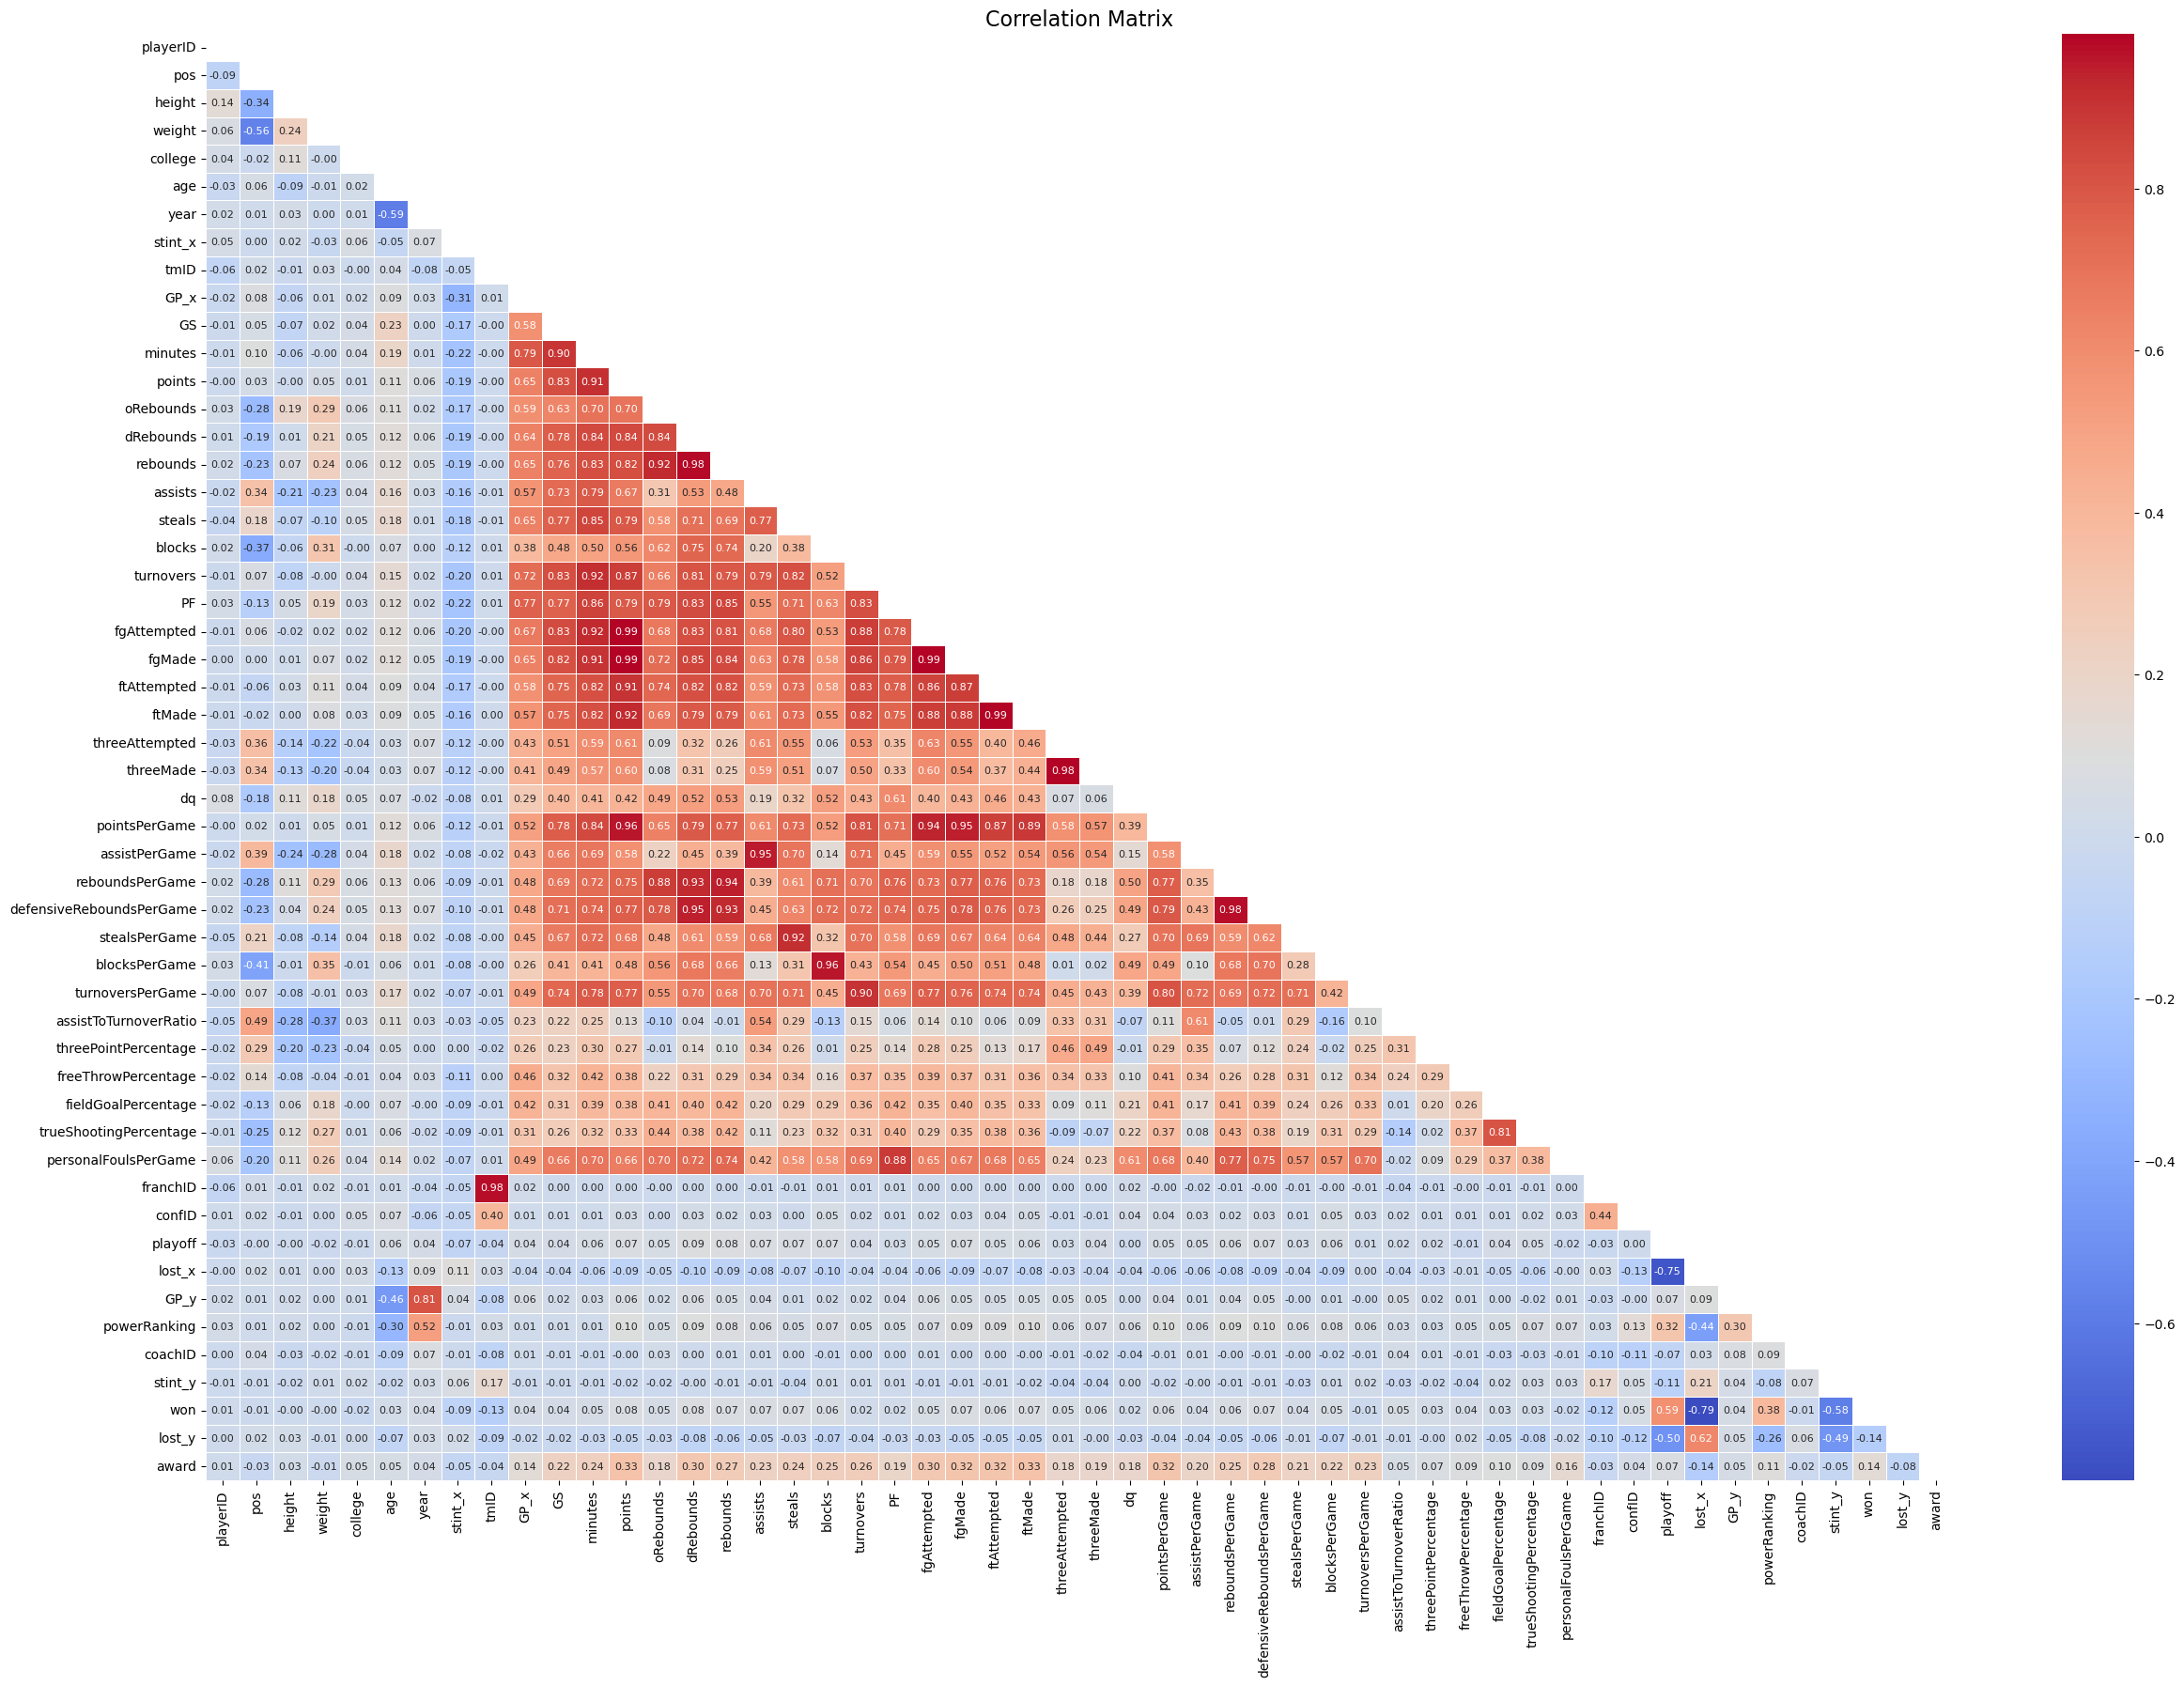

Correlation between target and playerID: -0.02614930245820983
Correlation between target and pos: -0.001845628397770584
Correlation between target and height: -0.0043554294071230975
Correlation between target and weight: -0.017892883415482678
Correlation between target and college: -0.01291486719537089
Correlation between target and age: 0.05642320502504394
Correlation between target and year: 0.040214455056607534
Correlation between target and stint_x: -0.07449526965988015
Correlation between target and tmID: -0.04322867455989532
Correlation between target and GP_x: 0.04426937806377397
Correlation between target and GS: 0.041083399135183676
Correlation between target and minutes: 0.05587365865964624
Correlation between target and points: 0.07147011512867557
Correlation between target and oRebounds: 0.05463065122548272
Correlation between target and dRebounds: 0.08833291006760535
Correlation between target and rebounds: 0.08048758562729014
Correlation between target and assists: 0.0738

{'playerID': -0.02614930245820983,
 'pos': -0.001845628397770584,
 'height': -0.0043554294071230975,
 'weight': -0.017892883415482678,
 'college': -0.01291486719537089,
 'age': 0.05642320502504394,
 'year': 0.040214455056607534,
 'stint_x': -0.07449526965988015,
 'tmID': -0.04322867455989532,
 'GP_x': 0.04426937806377397,
 'GS': 0.041083399135183676,
 'minutes': 0.05587365865964624,
 'points': 0.07147011512867557,
 'oRebounds': 0.05463065122548272,
 'dRebounds': 0.08833291006760535,
 'rebounds': 0.08048758562729014,
 'assists': 0.07387993862082314,
 'steals': 0.06779173963108431,
 'blocks': 0.06880640579810199,
 'turnovers': 0.04105787443774079,
 'PF': 0.02747787910107492,
 'fgAttempted': 0.05408225034890618,
 'fgMade': 0.07481297383539545,
 'ftAttempted': 0.05464031347728385,
 'ftMade': 0.05622518265700852,
 'threeAttempted': 0.027648927119060054,
 'threeMade': 0.03663633826975377,
 'dq': 0.003994781808075093,
 'pointsPerGame': 0.04658850660551351,
 'assistPerGame': 0.0478058842380530

In [143]:
correlation_matrix(merge_award_teams)

In [144]:
#final = pd.merge(merge_award_teams, awards_coaches, on=['coachID', 'year'], how='outer')
#final.to_csv('final.csv', index=False)
#final.drop('')
#final.tail()

## Classification

Applying machine learning models.

target label: 'playoff'
to know if a team in a given year will make it to the playoffs

### Encoding

In [145]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the columns 'teamID', 'franchID', 'confID', 'name', 'arena'
merge_award_teams['pos'] = label_encoder.fit_transform(merge_award_teams['pos'])
merge_award_teams['college'] = label_encoder.fit_transform(merge_award_teams['college'])
merge_award_teams['tmID'] = label_encoder.fit_transform(merge_award_teams['tmID'])
merge_award_teams['franchID'] = label_encoder.fit_transform(merge_award_teams['franchID'])
merge_award_teams['confID'] = label_encoder.fit_transform(merge_award_teams['confID'])
merge_award_teams['award'] = label_encoder.fit_transform(merge_award_teams['award'])

In [146]:
print(merge_award_teams['playoff'].value_counts())
print(merge_award_teams['playoff'].isnull().sum())
merge_award_teams.dropna(subset=['playoff'], inplace=True)
merge_award_teams = merge_award_teams.drop(columns=['playerID', 'coachID'])

merge_award_teams.to_csv("merge_award_teams.csv", index=False)

playoff
 1    1163
 0     997
-1       3
Name: count, dtype: int64
0


### Models

#### Decision Tree Model

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split the data into features (X) and the target variable (y)
X = merge_award_teams.drop('playoff', axis=1)
y = merge_award_teams['playoff']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('Accuracy = ' , accuracy)
print(report)
print(confusion)

Accuracy =  1.0
              precision    recall  f1-score   support

           N       1.00      1.00      1.00       208
           Y       1.00      1.00      1.00       224

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432

[[208   0]
 [  0 224]]


### Random Forest

In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into features (X) and the target variable (y)
X = merge_award_teams.drop('playoff', axis=1)
y = merge_award_teams['playoff']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators) as needed
random_forest.fit(X_train, y_train)

# Make predictions
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('Accuracy =', accuracy)
print(report)
print(confusion)

Accuracy = 0.9745370370370371
              precision    recall  f1-score   support

           N       0.97      0.98      0.97       208
           Y       0.98      0.97      0.98       224

    accuracy                           0.97       432
   macro avg       0.97      0.97      0.97       432
weighted avg       0.97      0.97      0.97       432

[[204   4]
 [  7 217]]
